## About dataset:
This dataset is taken from Kaggle. It contains some basic data about customers like Customer ID, age, gender, annual income and spending score. The aim behind this project is to know more about the customers like who can be easily converge (target customers) so that the sense can be given to marketing team and plan the strategy accordingly.

Dataset link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## Problem statement:
To perform customer segmentation analysis

I will demonstrate this through unsupervised ML technique, namely, KMeans Clustering algorithm.

## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

## Import data

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring data

In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Observation:
* There are 5 columns and 200 rows in given dataset.
* All the columns are numerical except 'Gender' which is categorical in nature.
* There are neither any missing values nor any duplicate values in the dataset. 

## Data preprocessing

* ### Remove unnecessary columns
As 'CustomerID' is not statistically important, drop this column. 

In [8]:
df.drop('CustomerID', axis = 1, inplace = True)

* ### Renaming columns

In [9]:
df.columns = ['Gender', 'Age', 'Annual_income', 'Spending_score']

* ### Converting categorical column into numerical data type 

In [10]:
df['Gender'].replace({"Male":1,"Female":2}, inplace = True)
df.head(2)

,Gender,Age,Annual_income,Spending_score
0,1,19,15,39
1,1,21,15,81


We have preprocessed our data successfully. Let's explore it more through data visualization.

## Data Vizualization

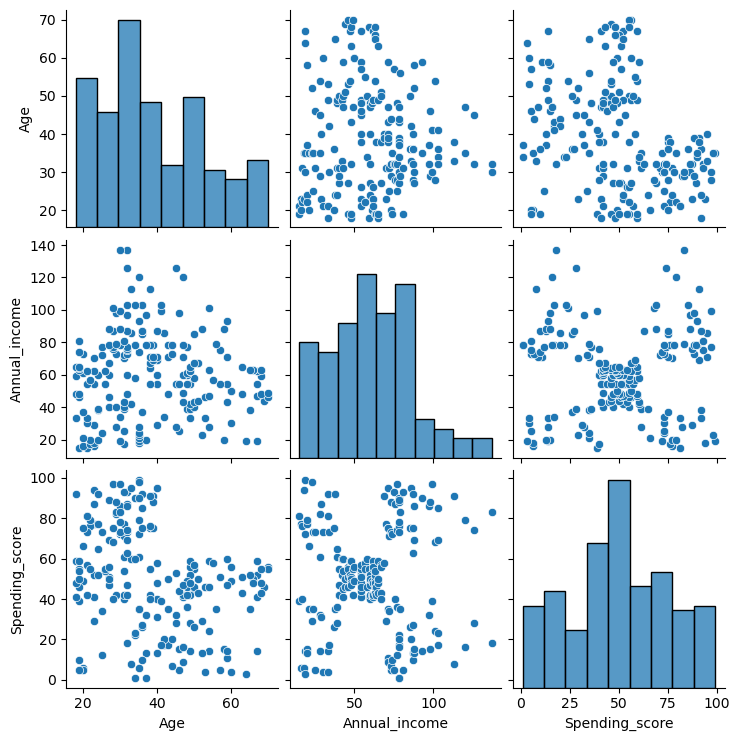

In [11]:
sns.pairplot(df[['Age','Annual_income','Spending_score']])

Above pairplot gives bivariate analysis of given dataset. 

The plots along diagonal are histograms. They show data distribution of mentioned columns. The age column has most values in the range of 30 to 40 years. Annual_income values are largely concentrated in 50 to 90 thousand dollars and that of spending_score between 40 to 50.

All the other plots are scatterplots. They show relation between two variables. 

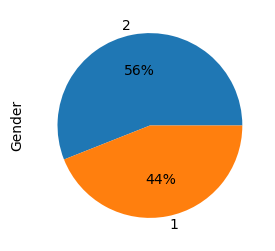

In [12]:
plt.figure(figsize=(3,3)) 
df['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

Nearly 56% are females and 44% are males in given customer dataset.

## Customer segmentation analysis using KMeans Clustering

In [13]:
from sklearn.cluster import KMeans
wcss = []
n_clusters = range(2,10)
for k in n_clusters:
    cluster = KMeans(n_clusters=k)
    cluster.fit_predict(df)
    wcss.append(cluster.inertia_)

In [14]:
wcss

[212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51130.69008126376,
 44391.820804870804,
 40879.07104377104]

Notice how the wcss is decreasing when number of clusters increase from 2 to 10. Let's visualize it to find the elbow point, which will give us the number of clusters to be formed.

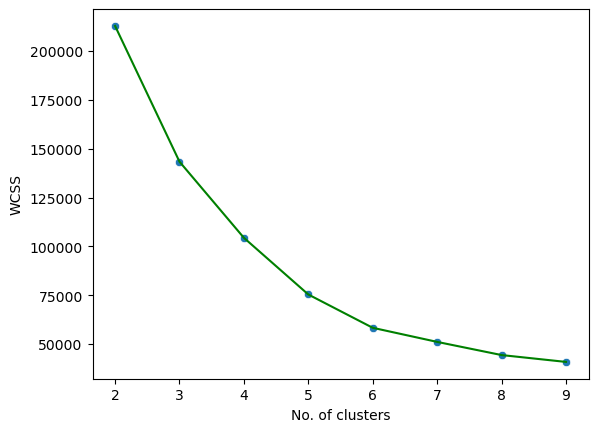

In [15]:
sns.scatterplot(n_clusters,wcss)
sns.lineplot(n_clusters,wcss,color = 'green')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point seems at No. of clusters = 5. So let's group the given data into 5 clusters using KMeans algorithm.

In [16]:
cluster = KMeans(n_clusters=5)
y_pred = cluster.fit_predict(df)

In [17]:
# Viewing the clusters formed
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

We have grouped the customers into 5 clusters. Let's vizualize them for better understanding.

## Vizualizating clusters

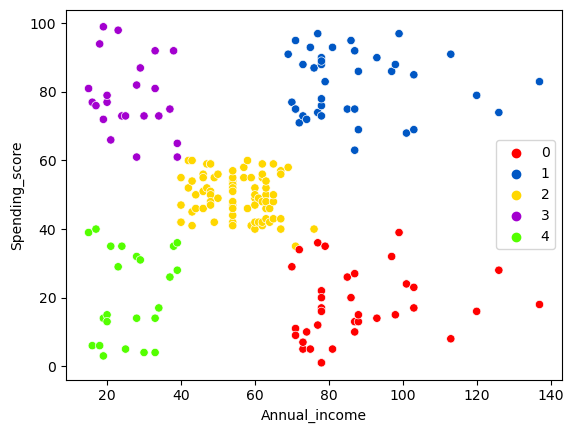

In [18]:
sns.scatterplot(x='Annual_income', y='Spending_score', hue= y_pred, data=df, palette='prism')
plt.show()

## Conclusion:
* We have grouped the customers into 5 clusters as can be seen from above plot.
* The customers in purple cluster have low income but high spending score. This shows careless shopping.
* The customers in green cluster have low income and low spending score. This shows people from lower middle class doing targeted shopping, mostly of essential commodities in day to day life.
* The customers from yellow cluster have moderate incomes and have average spending score. These are middle class people having extra income to spend besides essential commodities.
* The customers in blue cluster have high income and high spending score. These customers come from wealthy background who have income to spend on luxurious commodities.
* The customers in red cluster have high income but low spending score. These customers could be doing shopping mindfully.

### As a strategist, we can focus on blue and yellow cluster customers who can be easily converge!!